#  scikit-Learn presents a that implements a sing TLU (Threshold Logic Unit) network.

# TASK 1
# Use a perceptron classifier to predict whether a given iris flower 
# is of the species Iris setosa based on its petal length and petal width. 

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Perceptron from sklearn.linear_model for the perceptron classifier
#  load_iris from sklearn.datasets to load the Iris dataset.
iris = load_iris()

print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [2]:
# You assigned x to be the petal length and petal width, which are the 3rd and 4th features (indexing starts from 0) of the Iris dataset.
x = iris.data[:,(2,3)] # petal length, petal width

# You created the target variable y by checking if the target corresponds to Iris Setosa. 
# If it is, it's labeled as 1; otherwise, it's labeled as 0.
y = (iris.target == 0).astype(int) # Iris setosa?

# You instantiated a Perceptron classifier.
# You trained the perceptron classifier (per_clf) using the fit() method with x and y. 
per_clf = Perceptron()
per_clf.fit(x,y)

# You predicted the class of a new sample [2, 0.5] using the predict() method.
y_pred = per_clf.predict([[2,0.5]])

print("Predicted class:", y_pred)

Predicted class: [0]


In [3]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)


2024-04-26 02:49:51.955451: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 02:49:51.964947: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 02:49:52.161747: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 02:49:54.656904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


# Building an image classifier using the sequential API

In [4]:
# using keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#  when loading with using keras instead of Scikit-Learn, remember that 
# every image is represented as 28x28 array rather a 1D array of size 784.


In [5]:
# moreover, the pixel intensitiesd are inetgers (0 to 255) 
#  instead of float (0.0 to 255.0)


In [6]:
# looking at the shape and data type of trfaining set

print(X_train_full.shape)

(60000, 28, 28)


In [7]:
print(X_train_full.dtype)

uint8


#  Data set is split into training and test set  but no validation set. Let's create one

# Since we're going to train the NN using gradient descent, we must scale the input features. For simpliicity we scalle down to 0-1 range by dividing them by 255.0

In [8]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
#  For MNIST, when the lable is equal to 5, it means the iamge represents the handwritten 5. Easy.
# For fashion MNIST, we need the list of class names to know what we are dealing with:
# Example:

class_names = ["T-shirts/top","Trouser","Pullover","Dress","Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
# For example the first bimage in the training set represents a coat
print(class_names[y_train[0]])

Coat


In [11]:
#  Creating the model usibng sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))




/home/student/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# instead of adding the layers one by one as we did,
#  you can just pass a list of layers when creating the Sequential model

model = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
    
    ])

the models summary() method displays all the model's layers, including each layer's name (which is autom,atically generated unless you set it ehrn creating the layer).... The summary ends with the total numbwer of parameters including trainable and non-trainable parameters.

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# You can easily get a model's lsit of layers, to fetch a laer by it's index or by it's name

model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [16]:
model.get_layer('dense_3') is hidden1


True

In [17]:
# All parameters of a layer can be accessed using its get_weights() and set_weights() methods
#  For a Dense layer, this includes both the connection weights and the bias terms

weights, biases = hidden1.get_weights()
weights

array([[ 0.01918815, -0.02789132,  0.05091231, ...,  0.00318364,
         0.0681819 , -0.02836049],
       [-0.04527554,  0.06444542, -0.06854466, ...,  0.03760485,
        -0.053754  , -0.032523  ],
       [-0.03920981, -0.06553729,  0.06869903, ..., -0.02553987,
         0.06113097, -0.03916094],
       ...,
       [ 0.01775181,  0.0370803 , -0.05799056, ...,  0.05962604,
        -0.01531805,  0.03638051],
       [ 0.00012026,  0.0234767 ,  0.01268665, ..., -0.06842616,
        -0.06820598,  0.04970134],
       [ 0.05427918, -0.06398501,  0.03681192, ..., -0.01882217,
         0.02465776,  0.05234049]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
# Compiling the model
#  You mus cal its compile () method to specify the loss func and optimizer to use

model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [22]:
#  Training the model
#  The model is ready to be trained. For this we simply need to call its fit() method:


history =  model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))




Epoch 1/30


2024-04-26 02:49:58.766111: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6814 - loss: 0.9859 - val_accuracy: 0.8332 - val_loss: 0.5013
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8266 - loss: 0.4987 - val_accuracy: 0.8270 - val_loss: 0.4767
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8452 - loss: 0.4445 - val_accuracy: 0.8540 - val_loss: 0.4244
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8557 - loss: 0.4149 - val_accuracy: 0.8680 - val_loss: 0.3871
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8634 - loss: 0.3910 - val_accuracy: 0.8626 - val_loss: 0.3937
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8677 - loss: 0.3781 - val_accuracy: 0.8678 - val_loss: 0.3817
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8703 - loss: 0.3651 - val_accuracy: 0.8712 - val_loss: 0.3726
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8758 - loss: 0.3530 - va

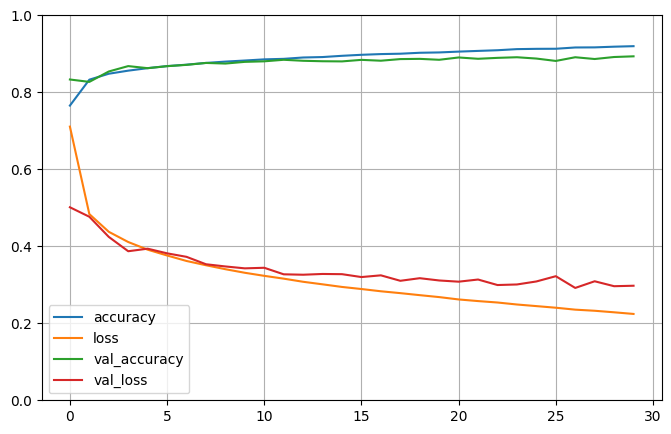

In [23]:
# learning curve 

import pandas as pd
import matplotlib.pyplot as plt

# Assuming history is a variable containing the training history of your model

# Creating a DataFrame from the training history and plotting
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()


In [ ]:
#  The vali curves are close to the training curves =>> No overfitting here

In [25]:
# Once satisfied with the model's validation accuracy, next task is to evaluate it on the test set 
# to estimate the generalization error before you deploy the model to production

# This can be domne using the evaluate metho()
#  it supports sevral other arguments such as batch_size, sample_weight

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8547 - loss: 61.1307


[64.6293716430664, 0.8496999740600586]

In [45]:
#  Using the model to make predictions using mopde's predict() method

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [53]:
y_predict = np.argmax(model.predict(X_new),axis = -1)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([9, 2, 1])

To correctly map the predicted class labels to their corresponding class names using NumPy, you can use NumPy indexing directly.

In [60]:
y_pred_labels = np.array(class_names)[y_pred]
print(y_pred_labels)

['Ankle boot' 'Pullover' 'Trouser']


# OR

To obtain the class labels for all elements in y_predict, you need to iterate over each element and map it to the corresponding class name using the class_names array.

In [61]:
y_pred_labels = [class_names[label] for label in y_predict]
print(y_pred_labels)

['Ankle boot', 'Pullover', 'Trouser']


Here, the classifier actually classified all three images correctly:

In [55]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#  Building a regression MLP using he Sequential API

In [ ]:
#  Swich to the california hosusing problem 
#  and tackle it using a regression nwural network


#  step 1

In [62]:
#  For simpilcity, load the data with Scikit-Learn's fetch_california_housing()
#  Split the data into trainin, validation and test stes
#  we scale all the features


In [66]:

# This function is used to load the California housing dataset.
from sklearn.datasets import fetch_california_housing

# This line imports the train_test_split function from the sklearn.model_selection module. 
# This function is used to split the dataset into training and testing subsets.
from sklearn.model_selection import train_test_split

# This class is used for feature scaling.
from sklearn.preprocessing import StandardScaler


#  This line loads the California housing dataset and assigns it to the variable housing
housing = fetch_california_housing()

# It uses the train_test_split function to split both the features (housing.data)
# and the target values (housing.target).
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target) 

# This line further splits the training subset (X_train_full and y_train_full) into training (X_train, y_train) 
# and validation (X_valid, y_valid) subsets. 
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full) 

# This line creates an instance of the StandardScaler class, which will be used to scale the features.
scaler = StandardScaler()

# This line fits the scaler to the training data (X_train) and transforms it. 
# It scales the features to have zero mean and unit variance.
X_train = scaler.fit_transform(X_train)

# This line transforms the validation data (X_valid) using the same scaler that was fitted to the training data.
# It ensures that both training and validation data are scaled consistently.
X_valid = scaler.transform(X_valid)

#  This line transforms the test data (X_test) using the same scaler as well, 
# ensuring consistency in scaling across all datasets.
X_test = scaler.transform(X_test)



In [71]:
# Using sequential API to build,train and evalute and use a regression MLP to make predictions 
# is quite similar to classification.
# 
# For a regression MLP of this nature, the output layer has a single neuron
# since we only want to predict a single value
#  and uses no activation function
#  and loss function is mean_squared_error

#  since the data is quite noisy, we just use a single hidden layer with fewer neurons than before
#  to avoid overfitting

#  buiding the model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # output, not activation func
    
])

#  training and evalauting the model
model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid,y_valid ))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.6169 - val_loss: 3.0942
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6148 - val_loss: 9.9362
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.0402 - val_loss: 0.4314
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4241 - val_loss: 0.5290
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4973 - val_loss: 0.3974
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4119 - val_loss: 0.3867
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3858 - val_loss: 0.3808
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3773 - val_loss: 0.3790
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3641 - val_loss: 0.3778
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3929 - val_loss: 0.3719
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3672 - val_loss: 0.3690
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step

In [72]:
y_pred

array([[2.4960792],
       [1.6230485],
       [1.4798285]], dtype=float32)